In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [2]:
df = pd.read_csv('lab2.csv')

In [3]:
df.head()

,ACCOUNT,SERVICE,VISIT
0,500026,CKING,1
1,500026,SVG,2
2,500026,ATM,3
3,500026,ATM,4
4,500075,CKING,1


In [4]:
# Group all Services by the same Account as a list

# By Converting Service to list and groupby + apply sum
df['SERVICE'] = df['SERVICE'].apply(lambda x: [x])
transactions = df.groupby(['ACCOUNT'])['SERVICE'].apply(sum).reset_index()
transactions.rename(columns={"ACCOUNT": "Account", "SERVICE": "Services"}, inplace = True)

# By iterating all rows
# transactions = dict()
# for index, row in df.iterrows():
#     if row['ACCOUNT'] not in transactions.keys():
#         transactions[row['ACCOUNT']] = list()
    
#     transactions[row['ACCOUNT']].append(row['SERVICE'])
# # Convert into pandas dataframe
# transactions = pd.DataFrame(list(transactions.items()), columns = ['Account','Services'])

transactions

# All last item of a transaction in the dataset are repeated
# Remove duplicated services used by the same account (Not required)
# transactions['Services'] = transactions['Services'].apply(lambda x: set(x))

# one hot encoding
# services = pd.get_dummies(df['SERVICE'], drop_first=False)
# df.drop('SERVICE', axis = 1, inplace = True)
# df.drop('VISIT', axis = 1, inplace = True)
# df = pd.concat([df, services], axis = 1)

,Account,Services
0,500026,"[CKING, SVG, ATM, ATM]"
1,500075,"[CKING, MMDA, SVG, ATM, TRUST, TRUST]"
2,500129,"[CKING, SVG, IRA, ATM, ATM]"
3,500256,"[CKING, SVG, CKCRD, CKCRD]"
4,500341,"[CKING, SVG, CKCRD, CKCRD]"
...,...,...
7986,999789,"[CKING, SVG, CKCRD, CKCRD]"
7987,999850,"[CKING, SVG, CD, ATM, ATM]"
7988,999881,"[CKING, SVG, CD, IRA, AUTO, AUTO]"
7989,999938,"[CKING, ATM, ATM]"


In [5]:
transactions.head(10)

,Account,Services
0,500026,"[CKING, SVG, ATM, ATM]"
1,500075,"[CKING, MMDA, SVG, ATM, TRUST, TRUST]"
2,500129,"[CKING, SVG, IRA, ATM, ATM]"
3,500256,"[CKING, SVG, CKCRD, CKCRD]"
4,500341,"[CKING, SVG, CKCRD, CKCRD]"
5,500350,"[CKING, CD, CD]"
6,500458,"[SVG, ATM, ATM]"
7,500595,"[CKING, SVG, CD, TRUST, TRUST]"
8,500743,"[CKING, SVG, CCRD, HMEQLC, MTG, CKCRD, CKCRD]"
9,500744,"[CKING, CD, CD]"


In [6]:
# Apply apriori algorithm to the services column
association_rules = apriori(transactions['Services'], min_support=0.05)
association_results = list(association_rules)

In [7]:
# view results in dataframe
pd.DataFrame(association_results)

,items,support,ordered_statistics
0,(ATM),0.384558,"[((), (ATM), 0.3845576273307471, 1.0)]"
1,(AUTO),0.092854,"[((), (AUTO), 0.09285446126892755, 1.0)]"
2,(CCRD),0.154799,"[((), (CCRD), 0.154799149042673, 1.0)]"
3,(CD),0.245276,"[((), (CD), 0.24527593542735576, 1.0)]"
4,(CKCRD),0.113002,"[((), (CKCRD), 0.11300212739331748, 1.0)]"
5,(CKING),0.857840,"[((), (CKING), 0.8578400700788387, 1.0)]"
6,(HMEQLC),0.164685,"[((), (HMEQLC), 0.164685270929796, 1.0)]"
7,(IRA),0.108372,"[((), (IRA), 0.10837191840820924, 1.0)]"
8,(MMDA),0.174446,"[((), (MMDA), 0.17444625203353772, 1.0)]"
9,(MTG),0.074334,"[((), (MTG), 0.07433362532849455, 1.0)]"


In [8]:
# For better view, unpack ordered_statistics
# codes below is taken from https://stackoverflow.com/questions/52688220/python-apyori-sorting-by-lift

results = pd.DataFrame(columns=('Items','Antecedent','Consequent','Support','Confidence','Lift'))

Support =[]
Confidence = []
Lift = []
Items = []
Antecedent = []
Consequent=[]

for RelationRecord in association_results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Items.append(RelationRecord.items)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)

results['Items'] = list(map(set, Items))                                   
results['Antecedent'] = list(map(set, Antecedent))
results['Consequent'] = list(map(set, Consequent))
results['Support'] = Support
results['Confidence'] = Confidence
results['Lift']= Lift

results.sort_index(ascending = False, inplace = True)
results.head(50)


,Items,Antecedent,Consequent,Support,Confidence,Lift
207,"{ATM, SVG, CKING, HMEQLC}","{CKING, SVG, HMEQLC}",{ATM},0.060944,0.546577,1.421313
206,"{ATM, SVG, CKING, HMEQLC}","{ATM, SVG, HMEQLC}",{CKING},0.060944,1.000000,1.165718
205,"{ATM, SVG, CKING, HMEQLC}","{ATM, SVG, CKING}",{HMEQLC},0.060944,0.245217,1.489001
204,"{ATM, SVG, CKING, HMEQLC}","{ATM, CKING, HMEQLC}",{SVG},0.060944,0.714076,1.154163
203,"{ATM, SVG, CKING, HMEQLC}","{HMEQLC, SVG}","{ATM, CKING}",0.060944,0.546577,1.510268
202,"{ATM, SVG, CKING, HMEQLC}","{CKING, SVG}","{ATM, HMEQLC}",0.060944,0.112497,1.318130
201,"{ATM, SVG, CKING, HMEQLC}","{CKING, HMEQLC}","{ATM, SVG}",0.060944,0.370061,1.440407
200,"{ATM, SVG, CKING, HMEQLC}","{ATM, SVG}","{CKING, HMEQLC}",0.060944,0.237214,1.440407
199,"{ATM, SVG, CKING, HMEQLC}","{ATM, HMEQLC}","{CKING, SVG}",0.060944,0.714076,1.318130
198,"{ATM, SVG, CKING, HMEQLC}","{ATM, CKING}","{HMEQLC, SVG}",0.060944,0.168396,1.510268


In [9]:
# Sort by Lift
results.sort_values(by ='Lift', ascending = False, inplace = True)
results.head(50)

,Items,Antecedent,Consequent,Support,Confidence,Lift
134,"{CKING, CCRD, CKCRD}","{CKING, CCRD}",{CKCRD},0.055813,0.375737,3.325045
131,"{CKING, CCRD, CKCRD}",{CKCRD},"{CKING, CCRD}",0.055813,0.493909,3.325045
33,"{CCRD, CKCRD}",{CCRD},{CKCRD},0.055813,0.360550,3.190645
130,"{CKING, CCRD, CKCRD}",{CCRD},"{CKING, CKCRD}",0.055813,0.360550,3.190645
34,"{CCRD, CKCRD}",{CKCRD},{CCRD},0.055813,0.493909,3.190645
135,"{CKING, CCRD, CKCRD}","{CKING, CKCRD}",{CCRD},0.055813,0.493909,3.190645
203,"{ATM, SVG, CKING, HMEQLC}","{HMEQLC, SVG}","{ATM, CKING}",0.060944,0.546577,1.510268
198,"{ATM, SVG, CKING, HMEQLC}","{ATM, CKING}","{HMEQLC, SVG}",0.060944,0.168396,1.510268
196,"{ATM, SVG, CKING, HMEQLC}",{HMEQLC},"{ATM, SVG, CKING}",0.060944,0.370061,1.489001
205,"{ATM, SVG, CKING, HMEQLC}","{ATM, SVG, CKING}",{HMEQLC},0.060944,0.245217,1.489001


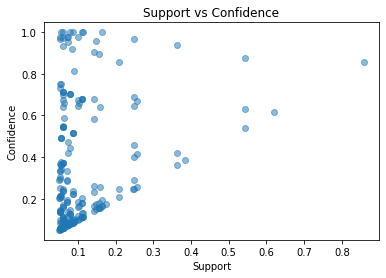

In [10]:
plt.scatter(results['Support'], results['Confidence'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence')
plt.show()

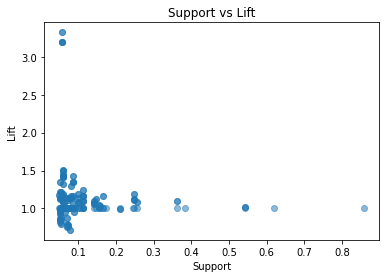

In [11]:
plt.scatter(results['Support'], results['Lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs Lift')
plt.show()

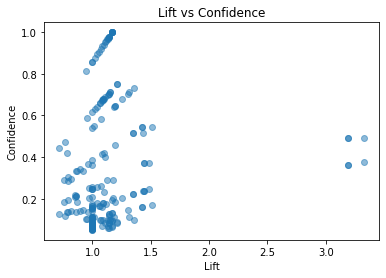

In [12]:
plt.scatter(results['Lift'], results['Confidence'], alpha=0.5)
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.show()